In [36]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
dataset_train= pd.read_csv("Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [38]:
from google.colab import files
uploaded = files.upload()


Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test (1).csv
Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train (1).csv


In [10]:
testing_set=  pd.read_csv("Google_Stock_Price_Test.csv")
training_set=dataset_train.iloc[:,1:2].values
print(training_set.shape)

(1258, 1)


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_training_set= scaler.fit_transform(training_set)

In [15]:
x_train=[]
y_train=[]
for i in range(60,1258):
  x_train.append(scaled_training_set[i-60:i,0])
  y_train.append(scaled_training_set[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)
print(x_train.shape,y_train.shape)

(1198, 60) (1198,)


In [16]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

In [20]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout



In [23]:
# Build the LSTM model
regressor = Sequential()

# First LSTM layer with 50 units, return_sequences=True, and input_shape
# equal to the number of features in the training data (X_train.shape[1])
# and 1 for the time step dimension
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# Add dropout layer with 20% dropout rate
regressor.add(Dropout(0.2))

# Second LSTM layer with 50 units and return_sequences=True
regressor.add(LSTM(units=50, return_sequences=True))

# Add dropout layer with 20% dropout rate
regressor.add(Dropout(0.2))

# Third LSTM layer with 50 units and return_sequences=True
regressor.add(LSTM(units=50, return_sequences=True))

# Add dropout layer with 20% dropout rate
regressor.add(Dropout(0.2))

# Final LSTM layer with 50 units
regressor.add(LSTM(units=50))

# Add dropout layer with 20% dropout rate
regressor.add(Dropout(0.2))

# Output layer with 1 unit for the predicted stock price
regressor.add(Dense(units=1))

In [25]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 16s 135ms/step - loss: 0.0467
Epoch 2/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0073
Epoch 3/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0057
Epoch 7/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0054
Epoch 8/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0052
Epoch 9/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0041
Epoch 13/100
38/38

In [26]:
actual_stock_price=testing_set.iloc[:,1:2].values

In [30]:
dataset_total = pd.concat((dataset_train['Open'], testing_set['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)- len(testing_set)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [34]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


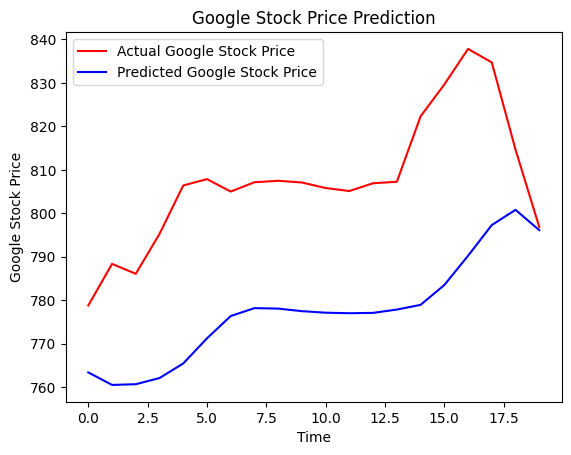

In [39]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')

plt.ylabel('Google Stock Price')
plt.legend()